# Analysing the Graph of Stack Overflow

**To be completed INDIVIDUALLY and due on May 3 at 3pm.**

In [1]:
print('Aaron Elliot')
print('U71617701')
print('ellioa2@bu.edu')

Aaron Elliot
U71617701
ellioa2@bu.edu


** (70 pts) **



In this assignment, we will look at posts on Stack Overflow during the year of 2015. We have downloaded the [data dump](http://cs-people.bu.edu/bahargam/506/stackoverflow-posts-2015.tar.gz) for Stack Overflow's posts in 2015. In this assignment, we will analyse the graph of interaction among users. The nodes in this graph will be the users. If $user_{i  }$ has answered a question of $user_{j}$ (or vice versa), there will be an edge between $node_{i}$ and $node_{j}$ in the graph.

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import networkx as nx
import math
from lxml import etree
from sklearn.preprocessing import MinMaxScaler
from networkx.algorithms.connectivity import minimum_st_edge_cut
from networkx.algorithms.flow import shortest_augmenting_path



In [2]:
xmlfile = 'stackoverflow-posts-2015.xml'
context = etree.iterparse(xmlfile)

G=nx.Graph()
n=0
m=0
#IDdf = pd.DataFrame(columns=["ID","OwnerUserID","ParentID"])
#print(elem.attrib)

ParentDic = {}

for action, elem in context: #for values in the xml, we extract the CreationDate and the First Tag
    if elem.get('PostTypeId') == '1': # if post is a question
        if m % 524288 == 0:
            print( "m = %d"%(m))
        ID = elem.get('Id')
        OwnerUserID = elem.get('OwnerUserId')
        if OwnerUserID == None or ID == None:
            continue
        G.add_node(OwnerUserID)   # then add the user ID to our graph
        ParentDic[ID] = OwnerUserID # and connect the question ID with user ID
        m = m+1
    if elem.get('PostTypeId') == "2": # if post is an answer
        if n % 524288 == 0:
            print( "n = %d"%(n))
        ParentID = elem.get('ParentId')
        OwnerUserID = elem.get('OwnerUserId')
        if OwnerUserID == None or ParentID == None:
            continue
        #IDdf.loc[n] = [ID,OwnerUserID,ParentID]
        if ParentID in ParentDic: # create an edge between question's user ID and answer User ID
            G.add_edge(ParentDic[ParentID],OwnerUserID)
        else:
            G.add_node(OwnerUserID) # or just add the user ID to the graph
        n=n+1
    elem.clear()
del n
del m
del ParentDic
#nx.draw(G)
print(nx.number_of_nodes(G))



n = 0
m = 0
n = 524288
m = 524288
n = 1048576
m = 1048576
n = 1572864
m = 1572864
n = 2097152
n = 2621440
m = 2097152
n = 3145728
1059780


## Step 1
Analyze the resulting graph in terms of the number of connected components and degree distribution.

In [4]:
DegList = list(nx.degree(G).values())
DegDic = {}
for D in DegList:
    if D in DegDic:
        DegDic[D] += 1
    else:
        DegDic[D] = 1

#print(IDdf)
#nx.draw(G,node_color='#6699cc')


(array([  1.05961400e+06,   1.31000000e+02,   2.20000000e+01,
          9.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([    0. ,   672.7,  1345.4,  2018.1,  2690.8,  3363.5,  4036.2,
         4708.9,  5381.6,  6054.3,  6727. ]),
 <a list of 10 Patch objects>)

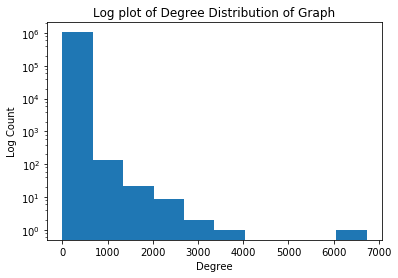

In [5]:

plt.yscale('log')
plt.ylabel('Log Count')
plt.title('Log plot of Degree Distribution of Graph')
plt.xscale('linear')
plt.xlabel('Degree')
plt.hist(DegList)


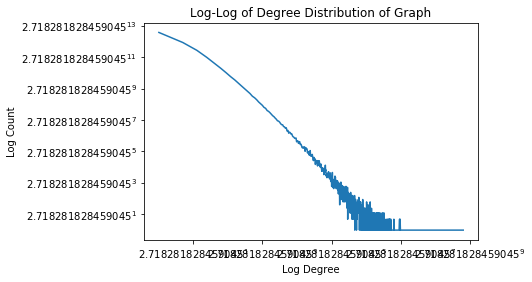

In [6]:
plt.title('Log-Log of Degree Distribution of Graph')
plt.ylabel('Log Count')
plt.xlabel('Log Degree')
DegList = sorted(DegDic.items())
Xlist, Ylist = zip(*DegList)
plt.loglog(Xlist,Ylist, basex=np.e, basey=np.e)
del Xlist
del Ylist

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# After plotting the degree distribution graph, it appears that the most
# linear graph (among log-log vs. log-linear) is the log-log plot of the 
# degree distribution. That implies that the optimal model is a power-law 
# distribution, f(x) = C * x**(-a). Futher implying that the distribution
# is right skewed/heavy tailed, and is scale free (Terzi, Networks I).
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [7]:
del DegDic
del DegList

## Step 2
Working with the largest connected component and using three of the methods we described in the class, find the centrality scores of the nodes in this component.  Then use the $L_{1}$ distance to perform a comparison of the three methods. Finally, visualize your results.

In [4]:
LargestCC = max(nx.connected_component_subgraphs(G), key=len) # largest connected component

In [5]:
LargestCC.remove_edges_from(LargestCC.selfloop_edges())
scaler = MinMaxScaler((50,800))

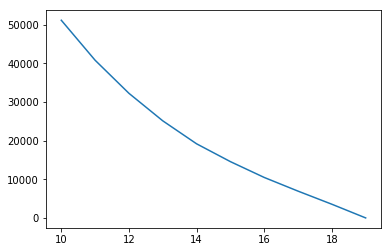

In [13]:
CoreCounts = []
for i in range(10,20):
    core_i = nx.k_core(LargestCC, i)
    CoreCounts.append(nx.number_of_nodes(core_i))
del core_i
plt.plot(range(10,20),CoreCounts)

In [6]:
core18 = nx.k_core(LargestCC, 18)

# Based on the graph above of Core # vs the number of nodes, core 18
# appears to be the largest set which the centality measures would
# still work on for my machine's memory limitations.
# It would have been ideal to have a larger subset of the connected
# component to work with, but some accuracy has to be sacraficed for
# efficiency

In [39]:
def L1 (x,y):
    dist = 0
    if len(x)==len(y):
        for i in range(len(x)):
            dist += math.fabs(x[i]-y[i])
        return(dist)
    else:
        print('vectors must be equal length for L1')
        return (Null)

In [25]:
Bcent = np.array(list(nx.betweenness_centrality(core18,normalized = True).values()))

In [26]:
scaledBC = scaler.fit_transform(Bcent)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [30]:
Ecent = np.array(list(nx.eigenvector_centrality_numpy(core18).values()))
scaledEC = scaler.fit_transform(Ecent[:,np.newaxis])

In [31]:
Ccent = np.array(list(nx.closeness_centrality(core18).values()))
scaledCC = scaler.fit_transform(Ccent[:,np.newaxis])

In [ ]:
L1_dist = [L1(scaledCC,scaledBC),L1(scaledEC,scaledBC),L1(scaledEC,scaledCC)]

In [50]:

print("""From the three measures we have explored, Eigenvalue centality
Betweenness centality and Closeness centality. We can now evaluate the
L1 distance between the measures""")
D = L1_dist[0]
print("The L1 distance between Closeness centality and Betweenness Centrality is %d implying average distance of %f"%\
      (D, D*1.0/nx.number_of_nodes(core18)))
D = L1_dist[1]
print("The L1 distance between Eigenvalue centality and Betweenness Centrality is %d implying average distance of %f"%\
      (D, D*1.0/nx.number_of_nodes(core18)))
D = L1_dist[2]
print("The L1 distance between Closeness centality and Eigenvalue Centrality is %d implying average distance of %f"%\
      (D, D*1.0/nx.number_of_nodes(core18)))

From the three measures we have explored, Eigenvalue centality
Betweenness centality and Closeness centality. We can now evaluate the
L1 distance between the measures
The L1 distance between Closeness centality and Betweenness Centrality is 1099862 implying average distance of 310.257536
The L1 distance between Eigenvalue centality and Betweenness Centrality is 166576 implying average distance of 46.989203
The L1 distance between Closeness centality and Eigenvalue Centrality is 933969 implying average distance of 263.461059


(array([  3.47800000e+03,   4.50000000e+01,   9.00000000e+00,
          5.00000000e+00,   1.00000000e+00,   4.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  50.,  125.,  200.,  275.,  350.,  425.,  500.,  575.,  650.,
         725.,  800.]),
 <a list of 10 Patch objects>)

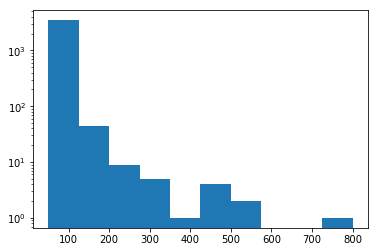

In [34]:
plt.yscale('log')
plt.hist(scaledBC)

(array([  2.76200000e+03,   6.31000000e+02,   9.20000000e+01,
          3.20000000e+01,   1.30000000e+01,   5.00000000e+00,
          4.00000000e+00,   4.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([  50.,  125.,  200.,  275.,  350.,  425.,  500.,  575.,  650.,
         725.,  800.]),
 <a list of 10 Patch objects>)

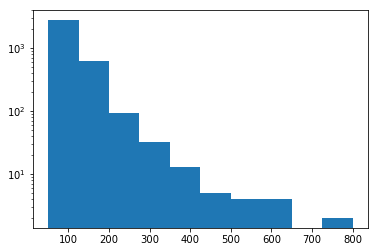

In [32]:
plt.yscale('log')
plt.hist(scaledEC)

(array([    7.,    17.,   265.,  1206.,  1305.,   528.,   155.,    42.,
           13.,     7.]),
 array([  50.,  125.,  200.,  275.,  350.,  425.,  500.,  575.,  650.,
         725.,  800.]),
 <a list of 10 Patch objects>)

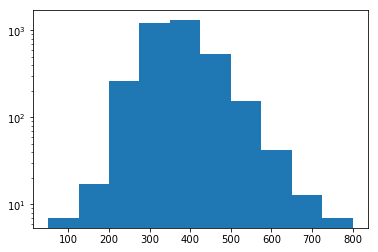

In [49]:
plt.yscale('log')
plt.hist(scaledCC)

In [52]:
print(""" Based on our results from L1 distance, we would expect eigenvalue centality 
and Betweenness centality to have similar distributions. While we expect Closeness 
centality to be distributed fairly differently from each of the other measures.""")

print("""From our results above, we can see exactly that, with the Closeness centality
being bell shaped, centered at 400, while Eigenvalue and Betweenness centality are left
screwed. Thus our results agreed.""")

 Based on our results from L1 distance, we would expect eigenvalue centality 
and Betweenness centality to have similar distributions. While we expect Closeness 
centality to be distributed fairly differently from each of the other measures.
From our results above, we can see exactly that, with the Closeness centality
being bell shaped, centered at 400, while Eigenvalue and Betweenness centality are left
screwed. Thus our results agreed.


## Step 3
Again working with the largest connected component, use two different methods for identifying communities (partitions of the graph). Visualize your results and compare the output of the two methods using standard clustering comparison methods we discussed in the class.

In [8]:
f = nx.fiedler_vector(core18)

In [9]:
s = np.zeros(len(f),dtype='int')
s[f>0]=1

In [10]:
pos=nx.spectral_layout(core18)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/ubuntu/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

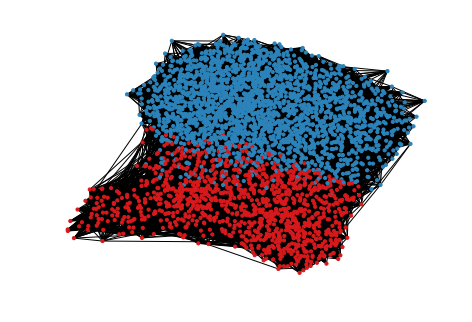

In [13]:
colors = ['#d7191c', '#2b83ba']
node_colors = [colors[s[v]] for v in range(nx.number_of_nodes(core18))]
nx.draw(core18, node_color=node_colors,node_size=10)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/ubuntu/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

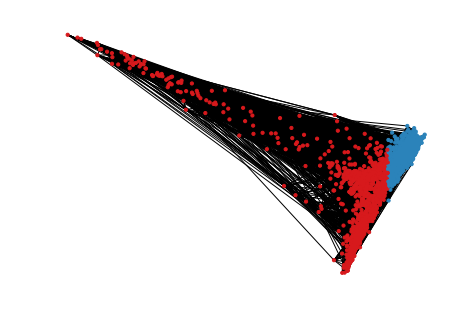

In [12]:
nx.draw(core18, pos=pos, node_color=node_colors,node_size=10)

In [15]:
LargestDegree = [0,0]
LD_name = ['','']
DegList = list(nx.degree(core18).items())
for i in range(nx.number_of_nodes(core18)):
    if LargestDegree[0]<DegList[i][1]:
        LargestDegree[0] = DegList[i][1]
        LD_name[0] = DegList[i][0]
        if LargestDegree[0]>LargestDegree[1]:
            LargestDegree[0] = LargestDegree[1]
            LD_name[0] = LD_name[1]
            LargestDegree[1] = DegList[i][1]
            LD_name[1] = DegList[i][0]
            

In [48]:
cut_edges = minimum_st_edge_cut(core18, s=LD_name[0], t=LD_name[1])
CCcopy = core18.copy()
CCcopy.remove_edges_from(cut_edges)
cc = nx.connected_components(core18)
node_set = {node: i for i, s in enumerate(cc) for node in s}

/home/ubuntu/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/ubuntu/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

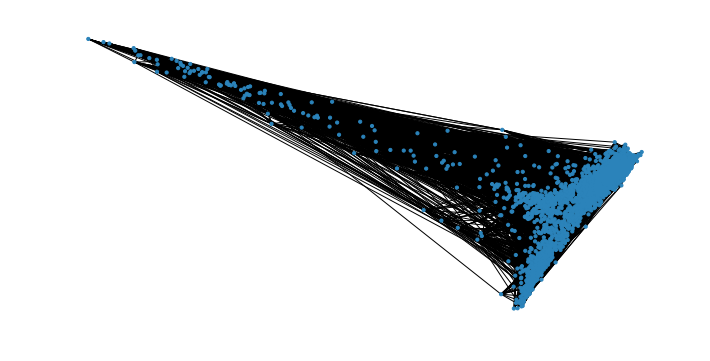

In [49]:
colors = ['#d7191c', '#2b83ba']
node_colors = []
node_colors = [ colors[i-1] for i in list(node_set.values())]
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(111)
nx.draw(core18, node_color=node_colors, pos=pos, node_size=10)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/ubuntu/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

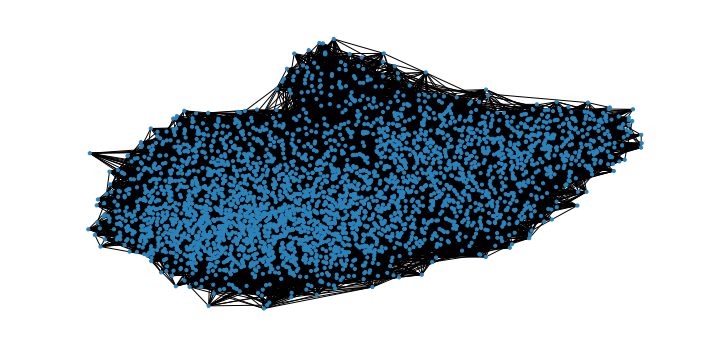

In [50]:
colors = ['#d7191c', '#2b83ba']
node_colors = []
node_colors = [ colors[i-1] for i in list(node_set.values())]
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(111)
nx.draw(core18, node_color=node_colors, node_size=10)

In [ ]:
print("""The results of this section are that Spectral Partitioning 
vastly outperforms S-T cut. This was to be expected, as we learned in
class that the minimum S-T cut, for large graphs, is likely to just 
isolate one of the two target points. However, the Spectral Partitioning
had interesting results, with Spring Layout appearing very well split.
The Spectral Layout shows that the blue group spectral positions are much
more densly packed than the red group. So overall the most successful
method was Spectral Partitioning.""")